## Load the dataset:

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Pollstar_all_genres.csv'
df = pd.read_csv(file_path)
df.head(5)

,Event Date,Number of Shows,Headliner,Support,Venue,City,State,Country,Market,Company Type,Currency,Promoter,Genre,Avg. Tickets Sold,Avg. Gross USD,Avg. Event Capacity,Avg. Capacity Sold,Ticket Price Min USD,Ticket Price Max USD,Ticket Price Avg. USD
0,2024-09-18,1,Creed,"3 Doors Down, Finger Eleven",Coastal Credit Union Music Park at Walnut Creek,Raleigh,North Carolina,United States,Raleigh-Durham (Fayetteville),Amphitheatre,US DOLLAR,Live Nation,Pop / Rock,20295.0,1228939.0,20295.0,100%,39.5,225.0,60.55
1,2024-09-14,1,Creed,"3 Doors Down, Finger Eleven",The Cynthia Woods Mitchell Pavilion,The Woodlands,Texas,United States,Houston,Amphitheatre,US DOLLAR,Live Nation,Pop / Rock,16308.0,1374174.0,16308.0,100%,39.5,225.0,84.26
2,2024-09-13,1,Bruce Springsteen & The E Street Band,NaN,Oriole Park at Camden Yards,Baltimore,Maryland,United States,Baltimore,Stadium,US DOLLAR,Live Nation,Pop / Rock,39646.0,6556587.0,39646.0,100%,49.5,299.5,165.38
3,2024-09-13,1,Creed,"3 Doors Down, Finger Eleven",Frost Bank Center,San Antonio,Texas,United States,San Antonio,Arena,US DOLLAR,Live Nation,Pop / Rock,14995.0,1402969.0,14995.0,100%,39.5,225.0,93.56
4,2024-09-13,1,"Billy Joel, Rod Stewart",NaN,Huntington Bank Field,Cleveland,Ohio,United States,Cleveland-Akron (Canton),Stadium,US DOLLAR,Live Nation,Pop / Rock,44553.0,9676590.0,44553.0,100%,69.5,349.5,217.19


In [5]:
df.describe()

,Number of Shows,Avg. Tickets Sold,Avg. Gross USD,Avg. Event Capacity,Ticket Price Min USD,Ticket Price Max USD,Ticket Price Avg. USD
count,704712.000000,704712.000000,7.047120e+05,7.047110e+05,704712.000000,7.047120e+05,704705.000000
mean,1.239227,2118.035761,1.182543e+05,2.959780e+03,26.739609,2.954617e+04,34.445816
std,6.974793,4086.646484,4.351617e+05,1.608935e+05,214.348712,2.475827e+07,71.872774
min,1.000000,0.000000,5.000000e-01,1.000000e+01,0.000000,-1.495000e+02,0.010000
25%,1.000000,300.000000,5.532000e+03,5.000000e+02,15.000000,1.500000e+01,16.370000
50%,1.000000,794.000000,2.100000e+04,1.147000e+03,23.000000,3.000000e+01,26.490000
75%,1.000000,1924.000000,8.186000e+04,2.497000e+03,35.000000,6.000000e+01,44.060000
max,5707.000000,190200.000000,8.005627e+07,1.350076e+08,156322.000000,2.078386e+10,44920.000000


In [6]:
df.shape

(704712, 20)

## Explore the time-series pattern:

In [7]:
#Sort by event date:
### Remove Avg ticket sold, avg capacity sold, avg ticket price

df['Event Date'] = pd.to_datetime(df['Event Date'], format='%Y-%m-%d')
df = df.sort_values(by = "Event Date")

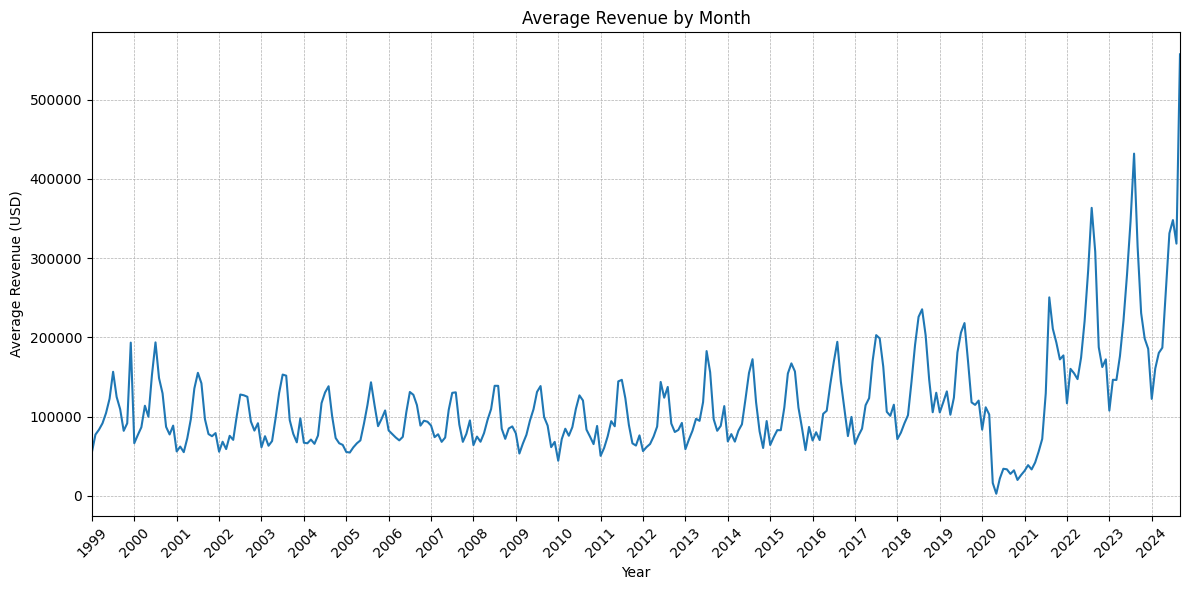

In [8]:
# See the average revenue w.r.t time:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['Month'] = df['Event Date'].dt.to_period('M')
avg_revenue = df.groupby(by = 'Month')["Avg. Gross USD"].mean()
#avg_revenue.index = avg_revenue.index.to_timestamp()

fig, ax = plt.subplots(figsize=(12, 6))
avg_revenue.plot(ax=ax, kind='line', linestyle='-')
ax.set_title('Average Revenue by Month')
ax.set_xlabel('Year')
ax.set_ylabel('Average Revenue (USD)')

# Set the x-axis ticks and labels
years = pd.date_range(start=df['Event Date'].min(), end=df['Event Date'].max(), freq='YS')
ax.set_xticks(years)
ax.set_xticklabels([year.strftime('%Y') for year in years])

plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

**Observations:**

1. Seasonal Trends: There are clear seasonal patterns in the revenue, which likely correlate with peaks in concert attendance. This might be tied to specific times of the year being more popular for concerts, such as summer months and end-of-year holidays.

2. Revenue Growth Over Time: There is a significant upward trend in revenue over the years, particularly noticeable from around 2017 onwards (IF OMITTING THE COVID PERIOD). This could suggest an increase in ticket prices, a greater number of concerts held, or a growing popularity of live events.

3. Volatility: The revenue appears quite unstable, with sharp increases and decreases. The peaks and troughs may indicate periods of high and low activity in concert schedules, possibly driven by factors such as artist tour cycles, economic conditions affecting consumer spending, or external events (e.g., changes in social norms due to public health concerns).

4. Recent Sharp Increase: The very sharp increase in revenue in the most recent years displayed on the plot (around 2023 and 2024) might indicate a resurgence of live concerts following a period of reduced activity (perhaps due to pandemic-related restrictions lifting), or could be a result of significant events or tours in these years.

5. Long-Term Resilience: Despite fluctuations, the overall upward trend might reflect a robust demand for live entertainment, underscoring its resilience as an industry.

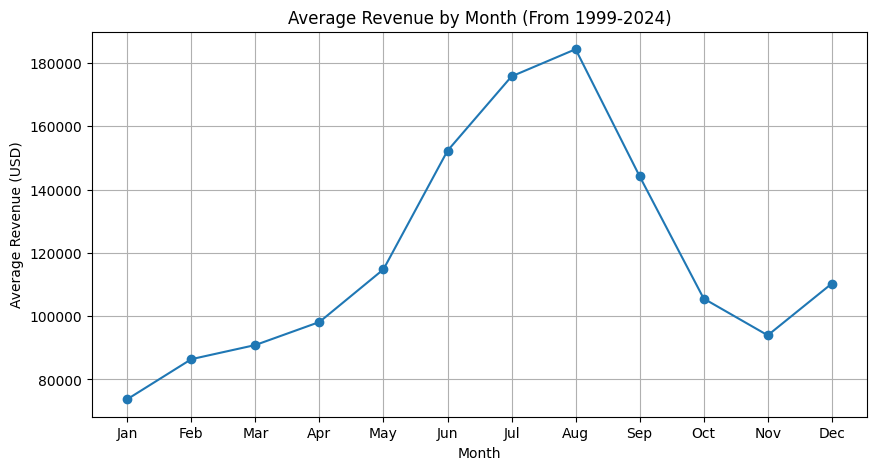

In [9]:
# Seasonal Patterns:
df['Month_1'] = df['Event Date'].dt.month
avg_revenue_by_month = df.groupby('Month_1')['Avg. Gross USD'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_revenue_by_month, marker='o', linestyle='-')
plt.title('Average Revenue by Month (From 1999-2024)')
plt.xlabel('Month')
plt.ylabel('Average Revenue (USD)')
plt.grid(True)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels to month names
plt.show()
del df

**Observations:**
1. Revenue Increase in the First Half of the Year: Starting from January, there is a steady increase in average revenue, peaking in July. This could indicate seasonal business activities that peak in the summer months.

2. Peak Revenue: July is the peak month for revenue, suggesting that this month is critical for the business's annual performance. The specific reasons for this peak could vary—such as seasonal sales, special events, or industry-specific factors.

3. Sharp Decline in Late Summer and Fall: After July, there is a sharp decline in revenue through September, with a particularly steep drop from August to September. This might be due to the end of a peak season or other market factors affecting demand.

4. Lowest Revenues in Late Year: October and November show the lowest revenue figures of the year, which then slightly increase in December. This could be related to cyclical end-of-year slowdowns, perhaps as markets prepare for the next fiscal year or due to consumer behavior changes.

5. End-of-Year Increase: The uptick in December could be associated with holiday shopping or end-of-year sales efforts.

## EDA:

### Fill the null value in the State column with Geopy:

In [10]:
!pip install geopy

In [11]:
from geopy.geocoders import Nominatim
def get_state(city):
  geolocator = Nominatim(user_agent="ARND")
  location = geolocator.geocode(city)
  #print(f'Address: {location.address}')
  if 'display_name' in location.raw:
      display_name_parts = location.raw['display_name'].split(',')

      if len(display_name_parts) > 2:
          state = display_name_parts[2].strip()
          return state
  else:
      return null

In [12]:
# Apply function to fill missing states
#df_new['State'] = df_new.apply(lambda x: get_state(x['City']) if pd.isnull(x['State']) else x['State'], axis=1)

### clean null value + feature selection

In [13]:
data = pd.read_csv(file_path)
df = data.iloc[:, -7:].dropna()
df['Event Date'] = data['Event Date']
df

,Avg. Tickets Sold,Avg. Gross USD,Avg. Event Capacity,Avg. Capacity Sold,Ticket Price Min USD,Ticket Price Max USD,Ticket Price Avg. USD,Event Date
0,20295.0,1228939.0,20295.0,100%,39.50,225.00,60.55,2024-09-18
1,16308.0,1374174.0,16308.0,100%,39.50,225.00,84.26,2024-09-14
2,39646.0,6556587.0,39646.0,100%,49.50,299.50,165.38,2024-09-13
3,14995.0,1402969.0,14995.0,100%,39.50,225.00,93.56,2024-09-13
4,44553.0,9676590.0,44553.0,100%,69.50,349.50,217.19,2024-09-13
...,...,...,...,...,...,...,...,...
704707,249.0,3735.0,350.0,71%,15.00,15.00,15.00,1999-01-01
704708,283.0,1981.0,283.0,100%,7.00,7.00,7.00,1999-01-01
704709,12218.0,325463.0,12218.0,100%,26.25,31.25,26.64,1999-01-01
704710,2800.0,152650.0,2800.0,100%,40.00,50.00,54.52,1999-01-01


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

features = df.drop('Avg. Gross USD', axis = 1)
features['Event Date'] = pd.to_datetime(features['Event Date'])

features['day_of_year'] = features['Event Date'].dt.dayofyear
features['sin_day'] = np.sin(features['day_of_year'] * (2 * np.pi / 365))
features['cos_day'] = np.cos(features['day_of_year'] * (2 * np.pi / 365))
features['Event Date'] = features['Event Date'].dt.year

# Remove the '%' sign, convert the string to a float. For example, 100% will be changed to 100
features['Avg. Capacity Sold'] = df['Avg. Capacity Sold'].str.replace("%", "").astype(float)


selected_features = ['Avg. Event Capacity',  'Ticket Price Min USD', 'Ticket Price Max USD']

features_time_series = ['day_of_year','Event Date', 'Avg. Event Capacity',  'Ticket Price Min USD', 'Ticket Price Max USD']

X = features[selected_features]
X1 = features[features_time_series]
y = df['Avg. Gross USD']

## Linear Regression:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the time-series data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [17]:
# Linear regression
lr = LinearRegression()
lr.fit(X1_train, y1_train)

# Predict on the testing set
y_pred = lr.predict(X1_test)

# Calculate metrics
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2 = r2_score(y1_test, y_pred)

print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print('\nMean squared error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R-squared (R2) Score:', r2)

#Prediction on the whole dataset:
y_pred_all = lr.predict(X1)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_all)
print('\nMean squared error on the whole dataset: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)

Coefficients: 
 [ 1.25436850e+02  4.87578699e+03  4.45443869e-02  4.07479712e+01
 -7.86406054e-06]
Intercept: 
 -9717503.537130594

Mean squared error:  170425061842.52225
Root Mean Squared Error:  412825.70395085897
R-squared (R2) Score: 0.008329875646021279

Mean squared error on the whole dataset:  187966933696.85672
Root Mean Squared Error: 433551.5352260406
R-squared (R2) Score: 0.00739578448396272


### With L1 regulatization LASSO:

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

elastic_net = ElasticNet(alpha=2.0, l1_ratio=1)

# Creating pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', elastic_net)
])

# Fitting the model
pipeline.fit(X1_train, y1_train)

# Predicting
y_pred = pipeline.predict(X1_test)

# Calculating RMSE
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y_pred)
# Output
print('Mean squared error: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)

#Prediction on the whole dataset:
y_pred_all = pipeline.predict(X1)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_all)
print('\nMean squared error on the whole dataset: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)

Mean squared error:  170425116655.2262
Root Mean Squared Error: 412825.7703380764
R-squared (R2) Score: 0.008329556701610397

Mean squared error on the whole dataset:  187966944675.5644
Root Mean Squared Error: 433551.5478874045
R-squared (R2) Score: 0.00739572650827891


## XGBoost

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Initialize

model = XGBRegressor(
    objective='reg:squarederror',
    max_depth=7,
    alpha=10,
    learning_rate=0.1,
    n_estimators=150,
    seed=42
)

# Fit
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)


#Prediction on the whole dataset:
y_pred_all = model.predict(X)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_all)
print('\nMean squared error on the whole dataset: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)

Mean squared error:  28742296944.83866
Root Mean Squared Error: 169535.53298597512
R-squared (R2) Score: 0.8327541919166523

Mean squared error on the whole dataset:  28761689214.326195
Root Mean Squared Error: 169592.71568769158
R-squared (R2) Score: 0.8481170416625265


## Random Forest:

In [20]:
#RF:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = rf.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y_pred)

#Output
print('Mean squared error: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)


#Prediction on the whole dataset:
y_pred_all = rf.predict(X1)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_all)
print('\nMean squared error on the whole dataset: ', mse)
print("Root Mean Squared Error:", rmse)
print('R-squared (R2) Score:', r2)

Mean squared error:  18548390519.623352
Root Mean Squared Error: 136192.47600224966
R-squared (R2) Score: 0.8920705409503824

Mean squared error on the whole dataset:  6439211683.018137
Root Mean Squared Error: 80244.6987845187
R-squared (R2) Score: 0.9659962072293421
